https://studiou.tistory.com/3

In [ ]:
import cv2

In [ ]:
print(cv2.__version__)

4.1.2


haarcascade Classifier : 얼굴의 경우 얼굴에서 보여주는 패턴, 눈이면 눈이 보여주는 이미지 패턴을 정리해놓은것

In [ ]:
# 얼굴
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

#눈
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

안전 운행하세요!


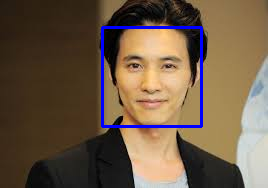

In [ ]:
from google.colab.patches import cv2_imshow
# 이미지 불러오기
img = cv2.imread('1.jpg',cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 얼굴 찾기
faces = face_cascade.detectMultiScale(gray, 1.1, 3)
# print(faces.shape) # 인원수 체크
try:
    # 얼굴 갯수
    if faces.shape[0] > 1:
        print(f'현재 탑승인원은 {faces.shape[0]}명 이므로 부정 탑승입니다. 전동 킥보드는 1대당 1인만 이용해주세요!')

        # 얼굴에 사각형을 그리기
        for (x, y, w, h) in faces:
          # 이미지 프레임에 (x,y)에서 시작, (x+넓이,y+길이)까지의 사각형을 그림(색 255 0 0, 굵기 2)
            cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
            # 얼굴 크기만큼 잘라 이미지 만듬
            face_img = img[y:y + h, x:x + w]
        cv2_imshow(img)
    else:
        print('안전 운행하세요!')
        for (x, y, w, h) in faces:
            cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
            face_img = img[y:y + h, x:x + w]
        cv2_imshow(img)
except:
    print('얼굴이 보이지 않아요. 카메라 각도를 조절해주세요!')

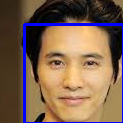

In [ ]:
# 여기셀 무시 연습하려고 한 셀(눈찾아보려고)

img = cv2.imread('1.jpg',cv2.IMREAD_COLOR)

 # 얼굴 찾기
 # (gray, scaleFactor,)
faces = face_cascade.detectMultiScale(gray, 1.1, 3)
for (x, y, w, h) in faces:
    cv2.rectangle(img,
                  (x, y), # 좌측상단 좌표
                  (x + w, y + h), # 우측하단 좌표
                  (255, 0, 0)# 색상, 2# 두께)
                  
    face_img = img[y - int(h/4):y + h, x - int(w/4):x + w]

    cv2_imshow(face_img)
    
    # # 눈 찾기
    # roi_color = img[y:y + h, x:x + w]
    # roi_gray = gray[y:y + h, x:x + w]
    # eyes = eye_cascade.detectMultiScale(roi_gray)

    # for (ex, ey, ew, eh) in eyes:
    #     cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)

안전 운행하세요!


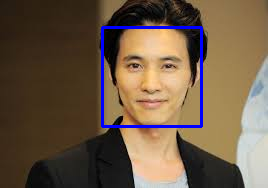

In [ ]:
from google.colab.patches import cv2_imshow
# 이미지 불러오기
img = cv2.imread('1.jpg',cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 얼굴 찾기
faces = face_cascade.detectMultiScale(gray, 1.1, 3)
# print(faces.shape) # 인원수 체크
try:
    # 얼굴 갯수
    if faces.shape[0] > 1:
        print(f'현재 탑승인원은 {faces.shape[0]}명 이므로 부정 탑승입니다. 전동 킥보드는 1대당 1인만 이용해주세요!')

        # 얼굴에 사각형을 그리고 눈을 찾기
        for (x, y, w, h) in faces:
          # 이미지 프레임에 (x,y)에서 시작, (x+넓이,y+길이)까지의 사각형을 그림(색 255 0 0, 굵기 2)
            cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
            # 얼굴 크기만큼 잘라 이미지 만듬
            face_img = img[y:y + h, x:x + w]
        cv2_imshow(img)
    else:
        print('안전 운행하세요!')
        for (x, y, w, h) in faces:
            cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
            face_img = img[y:y + h, x:x + w]
        cv2_imshow(img)
except:
    print('얼굴이 보이지 않아요. 카메라 각도를 조절해주세요!')

In [ ]:
cv2.imwrite('face.jpg', face_img)

True

#모자이크

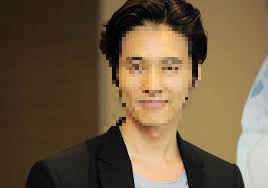

In [ ]:
img = cv2.imread('1.jpg',cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray)

# 모자이크 정도
ratio = 0.3

for x, y, w, h in faces:
    # 탐지된 얼굴 영역의 이미지를 resize
    small = cv2.resize(img[y: y + h, x: x + w],
                       None, fx=ratio,fy=ratio, # 모자이크 너비와 높이
                       interpolation=cv2.INTER_NEAREST) # 이미지를 원래 비율로 되돌려줌(모자이크처리됨)
    img[y: y + h, x: x + w] = cv2.resize(small, (w, h), interpolation=cv2.INTER_NEAREST)
cv2_imshow(img)

#모델적용

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# ResNet

https://bskyvision.com/1082

resnet50 마지막 층 커스텀


In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.layers import Dense, Input, Activation
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization

In [ ]:
model = ResNet50(weights='imagenet')

x = model.output
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)

# 예측 : 헬멧썻?안썼?->2 
predictions = Dense(2, activation='softmax')(x)


model = Model(inputs=model.input, outputs=predictions)

model.summary()

https://wooono.tistory.com/100

## Model compile() 
- 모델을 학습시키기 이전에, compile() 메소드를 통해서 학습 방식에 대한 환경설정을 해야 합니다.

- 다음 세 개의 인자를 입력으로 받습니다.

- 정규화기 (optimizer)

  - 훈련과정을 설정합니다. 즉, 최적화 알고리즘을 설정을 의미합니다.
  - adam, sgd, rmsprop, adagrad 등이 있습니다.

- 손실 함수 (loss function)

  - 모델이 최적화에 사용되는 목적 함수입니다.
  - mse, categorical_crossentropy, binary_crossentropy 등이 있습니다.

- 평가지표 (metric)

  - 훈련을 모니터링 하기 위해 사용됩니다.
  - 분류에서는 accuracy, 회귀에서는 mse, rmse, r2, mae, mspe, mape, msle 등이 있습니다.
  - 사용자가 메트릭을 정의해서 사용할 수도 있습니다.
  - metrics 관련 정리 [https://wooono.tistory.com/99]

In [ ]:
model.compile(    
                  # 훈련과정을 설정합니다. 즉, 최적화 알고리즘을 설정
                 optimizer=tf.keras.optimizers.Adam(1e-4) 
                 # 모델이 최적화에 사용되는 목적 함수
              # 3개이상 분류할 때 :categorical_crossentropy
                 ,loss='categorical_crossentropy'
                  # 정확도 몇인지 확인
                 ,metrics=['accuracy']
             )

In [ ]:
# 이미지를 증강하는 ImageGenerator 객체 생성
train_datagen = ImageDataGenerator(
	rotation_range=30, # 이미지 회전 각도
	zoom_range=0.15, # 이미지 확대 비율
	width_shift_range=0.2, # 이미지 가로 이동 비율
	height_shift_range=0.2, # 이미지 세로 이동 비율
	shear_range=0.15, # 이미지 기울기 비율
	horizontal_flip=True,# 이미지 좌우 반전
	fill_mode="nearest", # 이미지를 회전 이동시 빈공간을 채우는 방식
    rescale=1/255 # 이미지에 1/255 를 곱해줌
	)

In [ ]:
# 이미지 학습
model.fit(
	train_datagen.flow(X_train, y_train, batch_size = 32)
	,steps_per_epoch=len(X_train) // 32
	,epochs=16
)

##저장

In [ ]:
model.save("/content/drive/MyDrive/모듈프로젝트4_team8/ResNet_train.h5")

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


# 분류테스트

In [ ]:
# 데이터 경로
data_path = "/content/drive/MyDrive/모듈프로젝트4_team8/workspace/"

In [ ]:
path = '/content/drive/MyDrive/모듈프로젝트4_team8/성신/model/ResNet_train.h5'

In [ ]:
from tensorflow import keras 
model = keras.models.load_model(path)

In [ ]:
# CNN 모델 읽기
model = keras.models.load_model(path)

In [ ]:
your_model = tf.keras.models.load_model(
    path,
    custom_objects={'Functional':tf.keras.models.Model})

In [ ]:
# 모델 정보 조회
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________